0. preprocess +EDA + Feature selection
1. extract input and output columns
2. scale the values
3. train test split
4. train the model
5. evaluate the model / model selection
6. deploy the modelo

In [9]:
import numpy as np
import pandas as pd

In [10]:
df=pd.read_csv("/content/placement.csv")
df.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [11]:
df=df.iloc[:,1:]
df.head(5)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
df.info()
# so no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


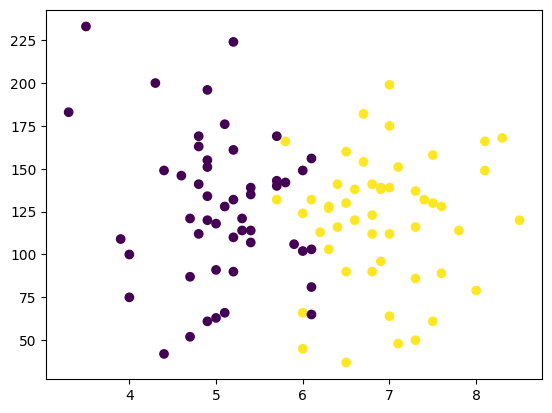

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df["cgpa"], df["iq"] , c=df["placement"])


In [16]:
x=df.iloc[:,0:2]  #input
y=df.iloc[:,-1]   #output

In [17]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

In [ ]:
x_test

In [24]:
y_train

,placement
20,1
92,0
23,0
29,1
66,1
...,...
21,1
30,1
83,1
32,1


In [25]:
y_test

,placement
49,0
12,0
74,1
70,1
69,1
73,0
98,1
84,0
79,1
41,0


In [27]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [28]:
x_train=scaler.fit_transform(x_train)

In [29]:
x_train # from -1 to 1

array([[ 0.53828173, -0.07551407],
       [-0.63691425, -0.31335364],
       [-1.0566271 , -0.86038467],
       [ 0.87405201, -0.26578573],
       [ 0.79010944, -0.64632905],
       [-0.80479939, -0.76524884],
       [ 1.54559258, -0.21821781],
       [-0.63691425,  0.8996282 ],
       [-0.88874196,  1.73206673],
       [ 1.79742029,  0.61422071],
       [-0.72085682,  1.25638757],
       [ 0.03462631, -1.8593109 ],
       [ 1.20982229,  0.20989343],
       [-0.63691425,  2.39801755],
       [-1.30845481, -1.93066278],
       [-1.6442251 , -1.14579217],
       [-1.0566271 , -0.05173011],
       [-1.30845481,  0.61422071],
       [ 0.70616687,  0.42394905],
       [-1.72816767, -0.3371376 ],
       [ 0.11856888,  0.78070842],
       [ 0.79010944,  0.35259717],
       [ 0.70616687, -0.7890328 ],
       [-0.46902911, -0.38470552],
       [-0.97268453,  1.08989987],
       [-0.97268453,  0.94719612],
       [-1.39239738,  1.82720256],
       [ 0.03462631,  0.01962177],
       [ 1.29376486,

In [30]:
x_test=scaler.fit_transform(x_test)
x_test

array([[-0.8170221 ,  0.3415111 ],
       [-0.8170221 ,  0.48090338],
       [ 0.65815669,  1.00362445],
       [ 0.20425552,  0.06272653],
       [ 2.70071194, -0.18120997],
       [-1.38439856, -2.23724617],
       [ 0.20425552, -0.77362718],
       [-0.47659622,  1.52634552],
       [ 0.43120611, -1.22665211],
       [-0.8170221 , -0.3902984 ],
       [-0.02269506, -0.77362718],
       [ 0.43120611,  1.21271288],
       [-1.15744797, -2.06300582],
       [-1.49787385, -0.45999454],
       [ 0.31773082,  0.55059953],
       [-0.47659622,  0.62029567],
       [ 0.88510727,  0.48090338],
       [-0.47659622,  0.23696688],
       [ 0.5446814 ,  0.44605531],
       [ 1.56595902,  1.14301674]])

In [32]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()

In [36]:
clf.fit(x_train,y_train)


LogisticRegression()

In [39]:
y_pred=clf.predict(x_test)

In [38]:
y_test

,placement
49,0
12,0
74,1
70,1
69,1
73,0
98,1
84,0
79,1
41,0


In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.95

<Axes: >

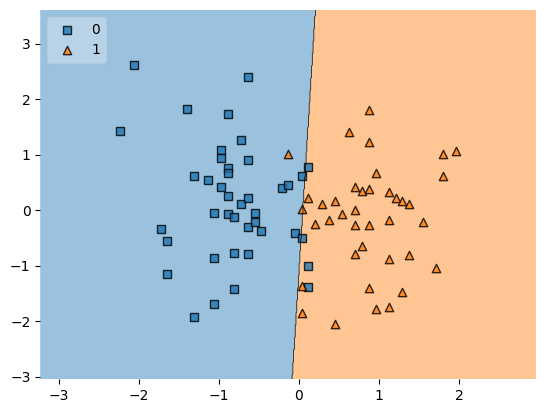

In [44]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train,y_train.values, clf=clf,legend=2)

In [47]:
import pickle



In [48]:
pickle.dump(clf,open("model.pkl","wb"))